# Tau Solver Run Time Comparison
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../../..')))

MatPlotLib is used for creating custom visualizations

In [2]:
import matplotlib.pyplot as plt

In [3]:
import time

In [4]:
import gillespy2

***
## Build the Simple Hybrid Model
***

In [5]:
def build_simple_hybrid(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="Simple_Hybrid_Model")

    # Define Variables (GillesPy2.Species)
    A = gillespy2.Species(name='A', initial_value=50)
    V = gillespy2.Species(name='V', initial_value=1)

    # Add Variables to Model
    model.add_species([A, V])

    # Define Parameters
    rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
    rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
    
    # Add Parameters to Model
    model.add_parameter([rate1, rate2])

    # Define Reactions
    r1 = gillespy2.Reaction(name="r1", reactants={}, products={'A': 1}, propensity_function="rate1 * V")
    r2 = gillespy2.Reaction(name="r2", reactants={'A': 1}, products={}, rate='rate2')

    # Add Reactions to Model
    model.add_reaction([r1, r2])
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=101)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [6]:
model = build_simple_hybrid()

***
## Run the Simulations
***
### Time Comparison Test Method

In [7]:
v_range = range(1, 1500, 5)
timing_data = {}

In [8]:
def run_test(algorithm):
    solver = model.get_best_solver_algo(algorithm)(model=model, variable=True)
    run_times = []
    for val in v_range:
        time_start = time.perf_counter()
        model.run(solver=solver, variables={"V": val})
        time_end = time.perf_counter()
        run_times.append(time_end - time_start)
    return run_times

### SSA

In [9]:
%time timing_data['SSA'] = run_test("SSA")

CPU times: user 132 ms, sys: 508 ms, total: 640 ms
Wall time: 26.1 s


### Tau Leaping

In [10]:
%time timing_data['tau_leaping'] = run_test("Tau-Leaping")

CPU times: user 106 ms, sys: 447 ms, total: 553 ms
Wall time: 10.1 s


### Tau Hybrid

In [11]:
%time timing_data['hybrid_tau'] = run_test("Tau-Hybrid")

CPU times: user 157 ms, sys: 522 ms, total: 679 ms
Wall time: 30.8 s


***
## Visualizations
***

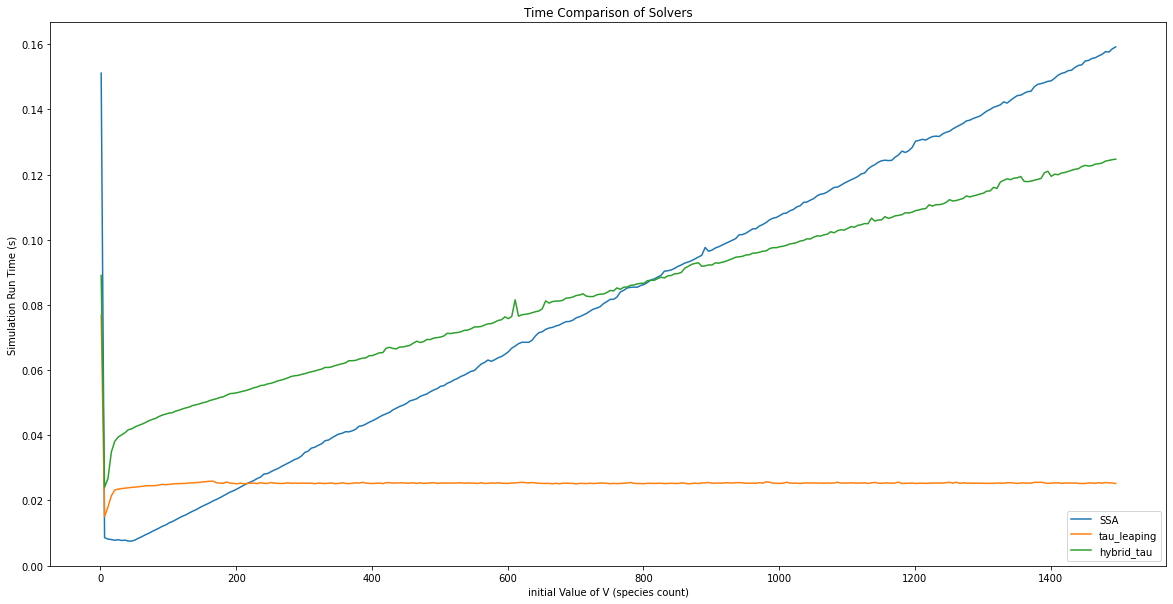

In [12]:
plt.figure(figsize=(20,10))
plt.title("Time Comparison of Solvers")
plt.xlabel("initial Value of V (species count)")
plt.ylabel("Simulation Run Time (s)")
plt.plot(v_range, timing_data['SSA'], label='SSA')
plt.plot(v_range, timing_data['tau_leaping'], label='tau_leaping')
plt.plot(v_range, timing_data['hybrid_tau'], label='hybrid_tau')
plt.legend(loc='best')
plt.savefig("TimeComparisonOfSolvers.pdf")